# Upper Confidence Bound (UCB)

In [1]:
options(repr.plot.width=16, repr.plot.height=10)

## Algorithm Steps

### **Step 1.**  
At each round $n$, we consider two numbers for each ad $i$:  
- $N_i(n)$ - the number of times the ad $i$ was selected up to round $n$.  
- $R_i(n)$ - the sum of rewards of the ad $i$ up to round $n$.  

### **Step 2.**  
From these two numbers, we compute:  

- The **average reward** of ad $i$ up to round $n$:  

  $$
  \bar{r}_i(n) = \frac{R_i(n)}{N_i(n)}
  $$

- The **confidence interval** $[ \bar{r}_i(n) - \Delta_i(n), \bar{r}_i(n) + \Delta_i(n) ]$ at round $n$, where:  

  $$
  \Delta_i(n) = \sqrt{\frac{3 \log(n)}{2 N_i(n)}}
  $$

### **Step 3.**  
We select the ad $i$ that has the **maximum UCB value**:  

$$
\bar{r}_i(n) + \Delta_i(n)
$$


## Libraries Loading

In [2]:
library(tidyverse)
library(ggplot2)

── Attaching core tidyverse packages ─────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ───────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


## Data Loading

In [3]:
data <- read_csv("../00_data/Ads_CTR_Optimisation.csv", show_col_types = FALSE)

head(data)

Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,0,0,1,0,0,0,1,0
0,0,0,0,0,0,0,0,1,0
0,0,0,0,0,0,0,0,0,0
0,1,0,0,0,0,0,1,0,0
0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0


In [4]:
dim(data)

[1] 10000    10

In [5]:
glimpse(data)

Rows: 10,000
Columns: 10
$ `Ad 1`  <dbl> 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ `Ad 2`  <dbl> 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,…
$ `Ad 3`  <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ `Ad 4`  <dbl> 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,…
$ `Ad 5`  <dbl> 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,…
$ `Ad 6`  <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ `Ad 7`  <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ `Ad 8`  <dbl> 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,…
$ `Ad 9`  <dbl> 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,…
$ `Ad 10` <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…


## Implementing UCB

In [6]:
max_round <- nrow(data)
max_ads <- ncol(data) 
selected_ads <- numeric(length = max_round)
ads_selection_counter <- numeric(length = max_ads)
ads_total_reward <- numeric(length = max_ads)
round_rewards <- numeric(length = max_round)

for(n in 1:max_round){
    selected_ad_idx <- 1
    max_upper_bound <- 0
    for(i in 1:max_ads){
        if(ads_selection_counter[i] > 0){
            average_reward <- as.numeric(ads_total_reward[i]) / as.numeric(ads_selection_counter[i])
            delta <- sqrt(3/2 * log(n) / ads_selection_counter[i])
            upper_bound <- average_reward + delta
        }
        else{
            upper_bound <- Inf
        }
        
        if(upper_bound > max_upper_bound){
            max_upper_bound <- upper_bound
            selected_ad_idx <- i
        }
    }
    selected_ads[n] <- selected_ad_idx
    ads_selection_counter[selected_ad_idx] <- ads_selection_counter[selected_ad_idx] + 1
    reward <- data[n, selected_ad_idx]
    ads_total_reward[selected_ad_idx] <- ads_total_reward[selected_ad_idx] + reward
    round_rewards[n] <- reward
}

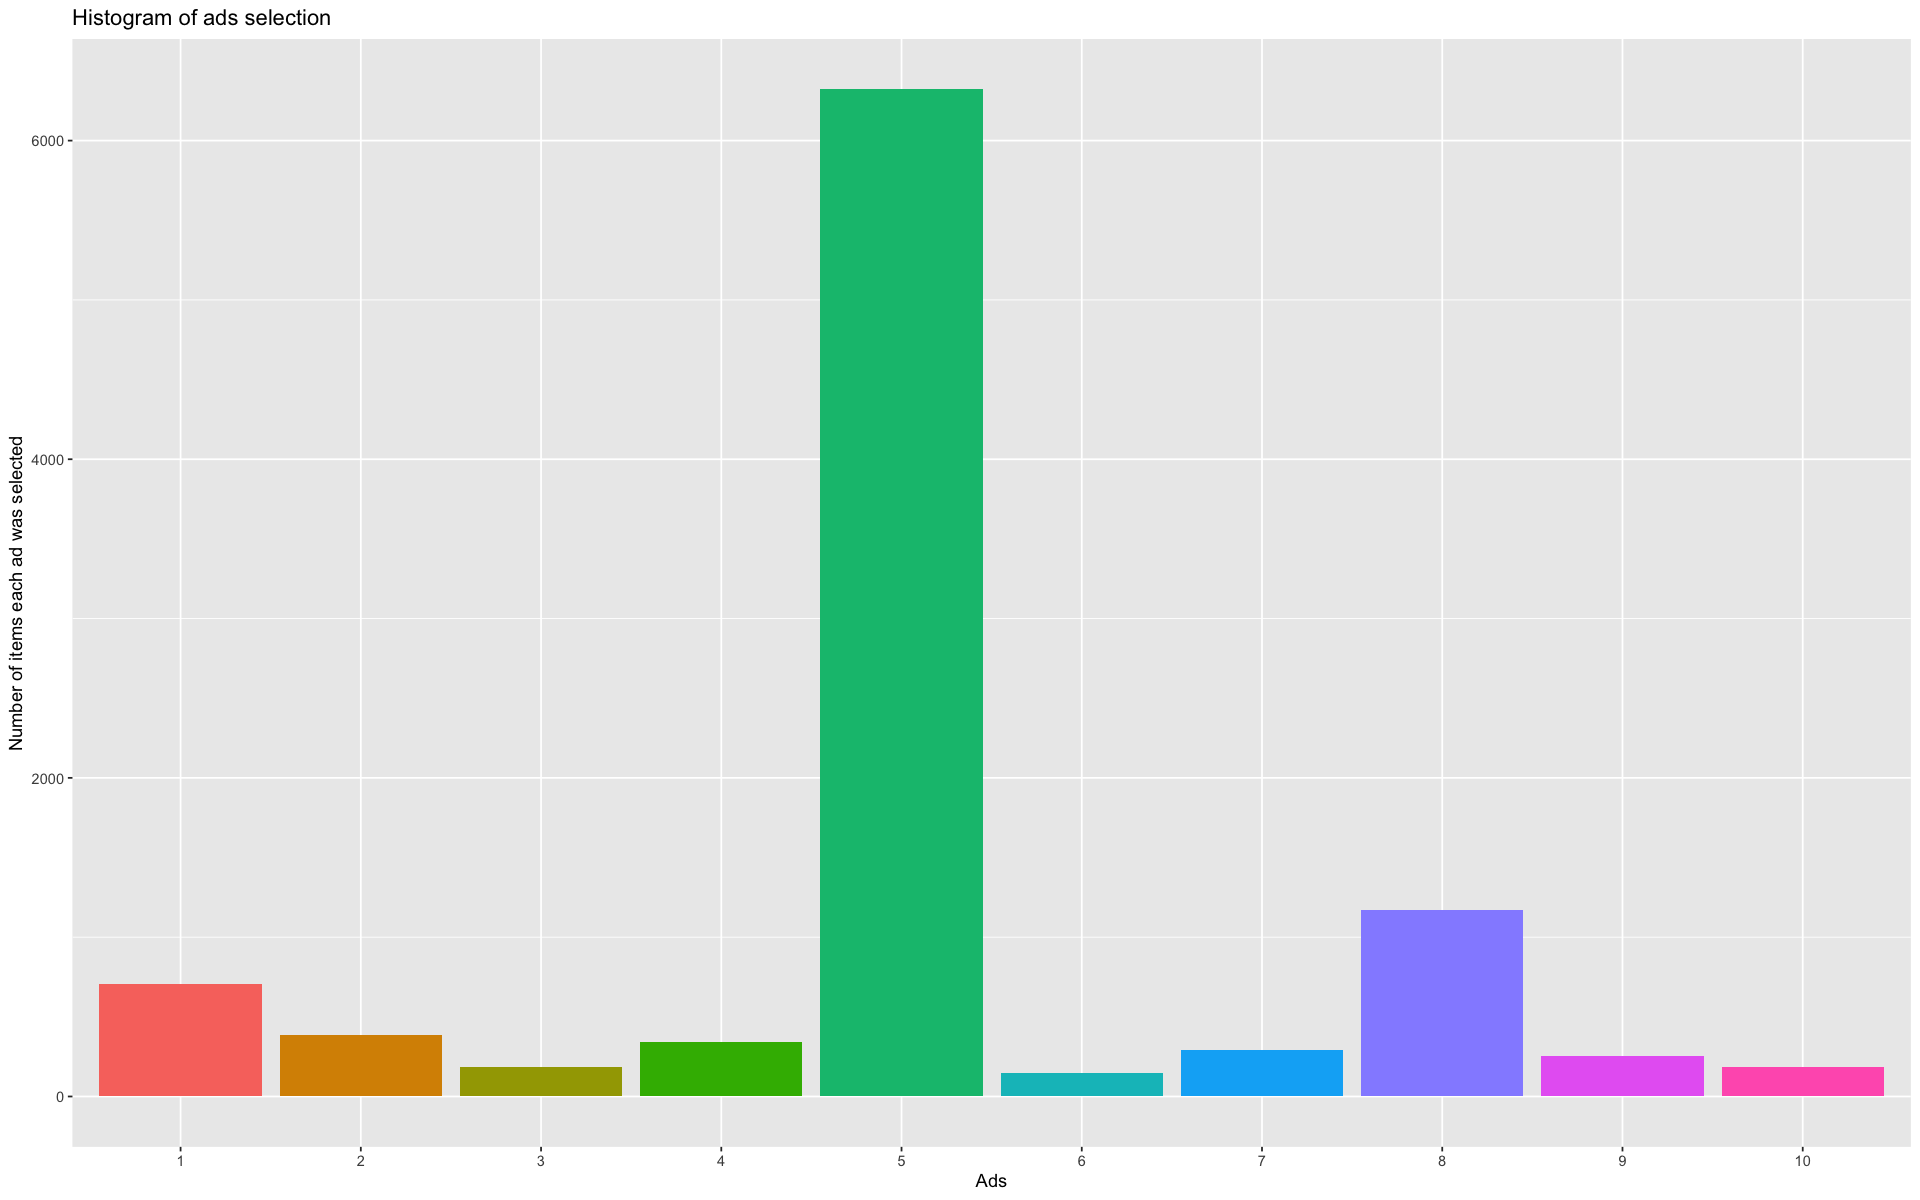

In [7]:
# plot histogram
ggplot(data.frame(ads = selected_ads)) +
    geom_bar(aes(x = factor(ads), fill = factor(ads))) +
    labs(title = "Histogram of ads selection",
         x = "Ads",
         y = "Number of items each ad was selected") +
    theme(legend.position = "None")

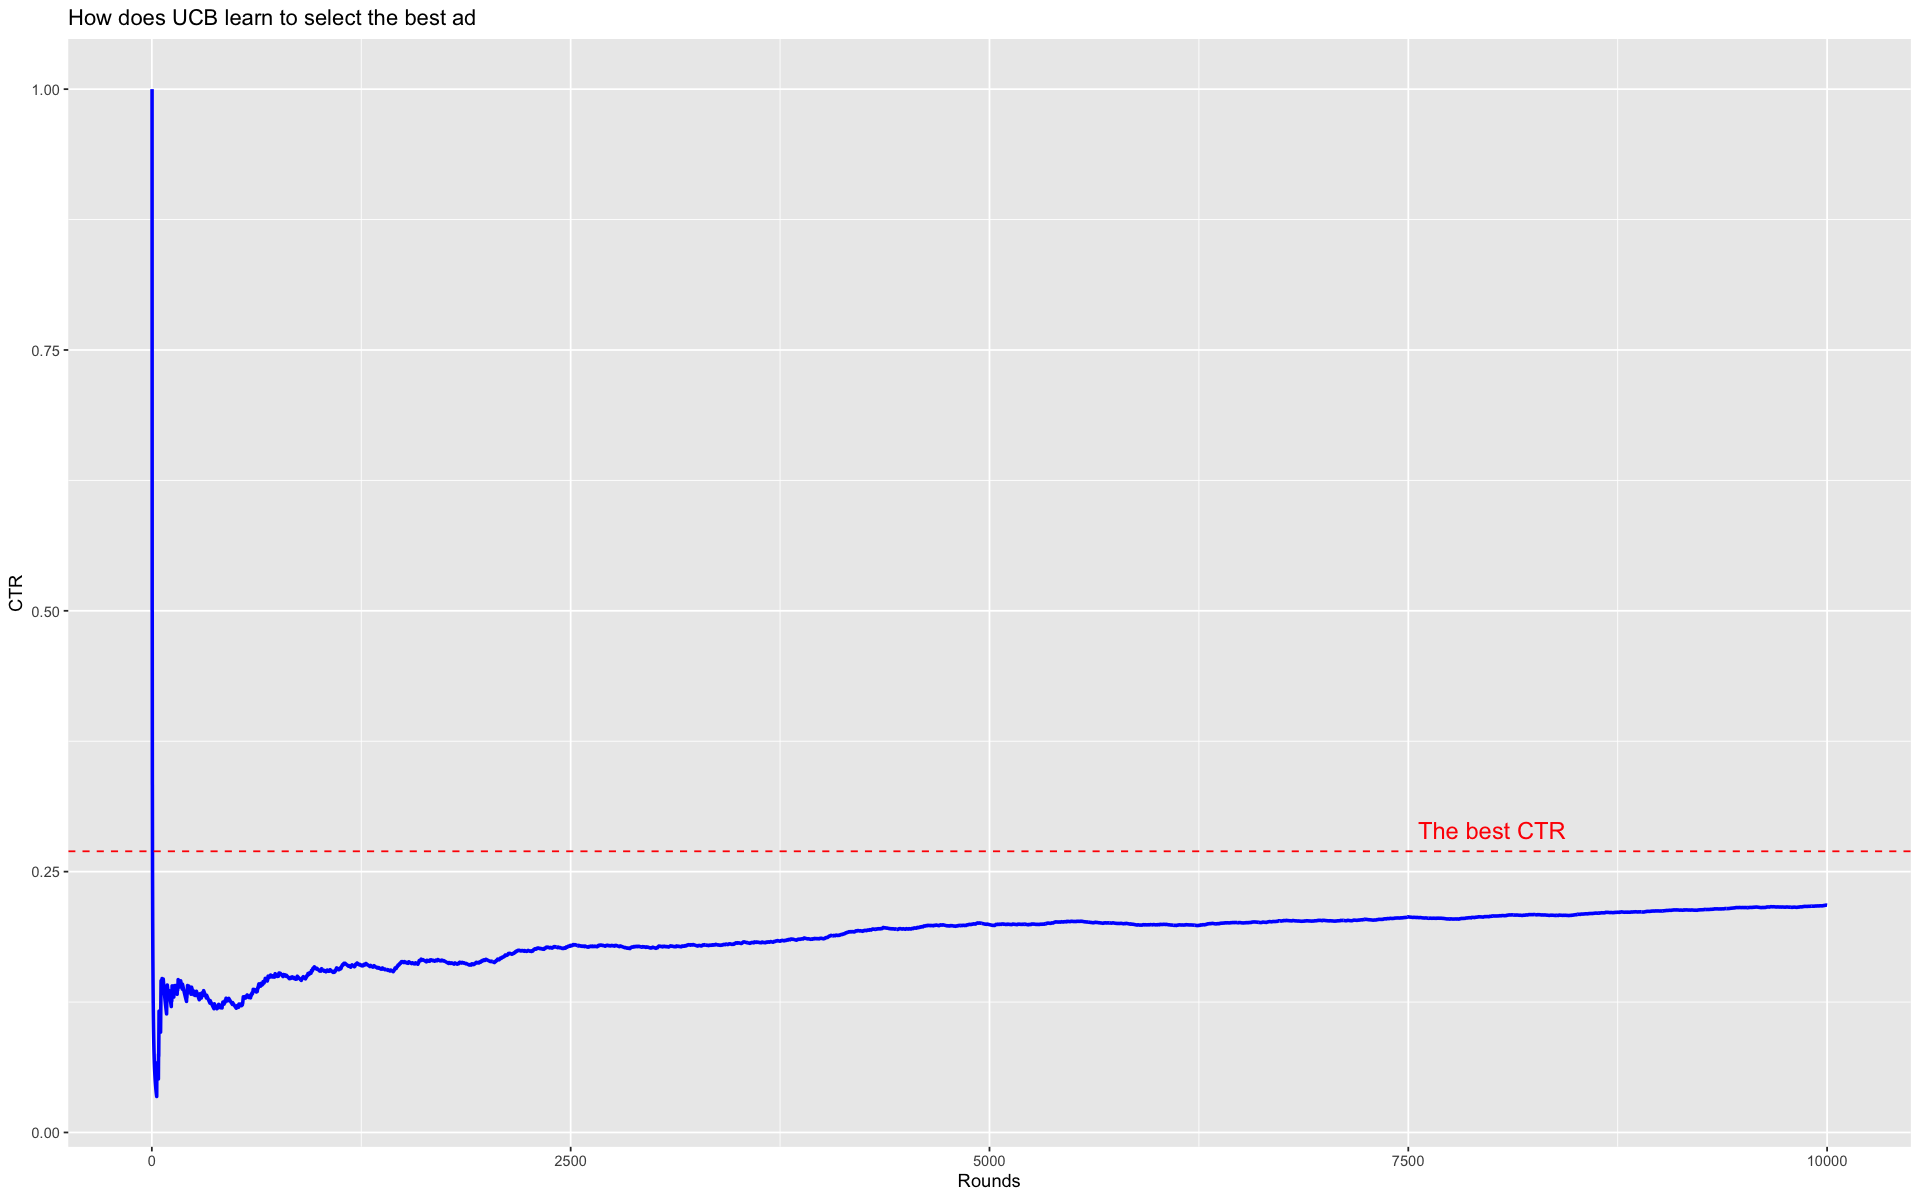

In [8]:
# plot the learning process 
best_ctr <- max(sapply(data, function(x) sum(x) / length(x)))
ggplot(data.frame(round = 1:max_round,
                        CTR = cumsum(round_rewards) / (1:max_round))) +
          geom_line(aes(x = round, y = CTR), color = "blue", linewidth=1) +
          geom_hline(yintercept = best_ctr, linetype = 2, color = "red") +
          annotate("text", x = max_round * 0.8, y = best_ctr + 0.02, label = "The best CTR", color = "red", size = 5) +
          labs(title = "How does UCB learn to select the best ad",
             x = "Rounds",
             y = "CTR") +
          theme(legend.position = "None")